#### Setup and Loading ####
**pip list**: shows the list of dependencies installed 

In [109]:
# 1.1 importing modules 
import tensorflow as tf
import os           #used to navigate file structure
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model

# 1.2 Remove dodgy images
    #to get data from google Images use download all images extension 
    #delete all files less then 10 kb + vector images 
    
import cv2
import imghdr       #checks file extensions for the optical images


In [45]:

#data dir path
data_dir = 'Data'
image_exts = ['jpeg','jpg','bmp','png']
os.listdir(data_dir)        #os.path.join(data_dir, 'happy')

['Happy', 'Sad']

In [46]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('img not in ext list {}'.format(image_path))
                os.remove(image_path)
        except exception as e:
            print('issue with image {}'.format(image_path))
            #os.remove(image_path)
                
        

#### Load Data ####

tf.data.dataset api can be used for dataset which allows us to create data pipelines and perform functions directly

use **??** for references its jupytr notebook function 

In [47]:
data = tf.keras.utils.image_dataset_from_directory('Data')
# as we cannot get this data directly bcz its loaded into memory directly we use
data_iterator = data.as_numpy_iterator()
#then from iterator we can pull a batch of data
#Returns an iterator which converts all elements of the dataset to numpy.
batch = data_iterator.next()


Found 167 files belonging to 2 classes.


In [55]:
#images represented as numpy arrays
batch[0].shape
#labels
#batch[1]

(32, 256, 256, 3)

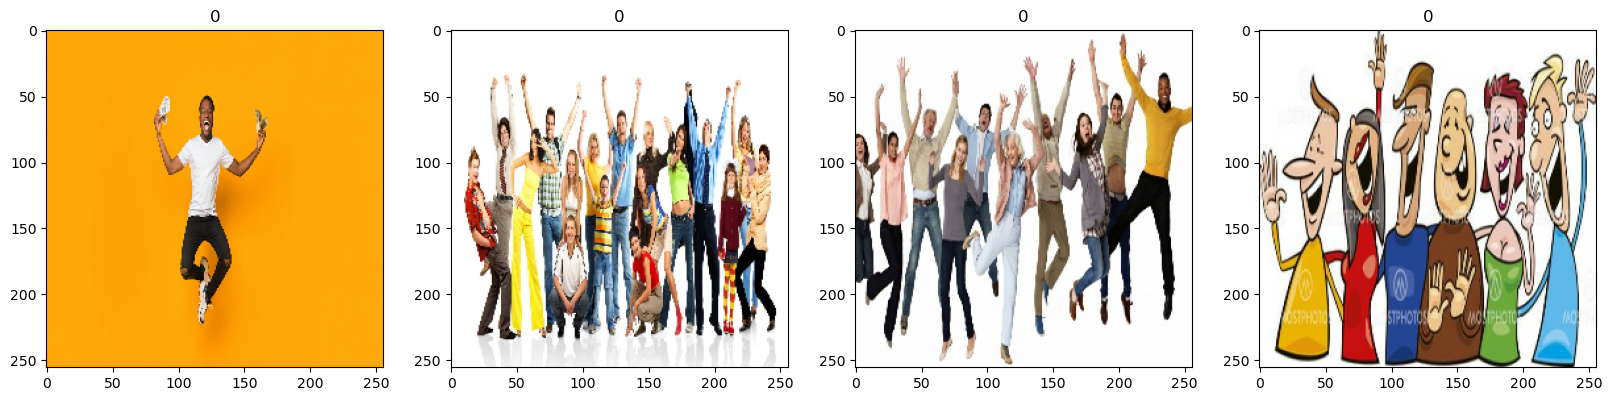

In [49]:
#to know which label is assigned to which category: happy, sad
fig , ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate (batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
#Class 0 for Happy
#Class 1 for Sad

#### Preprocess Data ####

**Scale Data** 


in order to scale data we divide the img with / 255 which will put the data between 0 and 1.


In [50]:
data = data.map(lambda x, y: (x/255, y))        #transformation to data b/w 0-1

In [51]:
data.as_numpy_iterator().next()[0].max()        #we can use both min max function to check the range

1.0

**Split data**

 for train and validation

In [52]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)        #evaluate the model while training
test_size = int(len(data)*.1)+1

In [56]:
#this divides how much data are we going to take in the pipeline
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

#### Modelling ####

**Model Building**
relu activation converts any -ve value to 0 and preserves the +ve values
model.add(Conv2D(16 '''filter''', (3,3) '''filter_size''', 1 '''stride''', activation='relu', input_shape=(256, 256, 3)))
model.add(Dense(256 '''no_of_output''', activation='relu'))
model.add(Dense(1 '''bcz sigmoid 0 or 1 output''', activation='sigmoid'))

In [61]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

#flatten just converts multi dimen tensor to single dimen ie: 30*30*16 from the above layer to 14400
model.add(Flatten())

#output layers
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [62]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

**Model Training**

In [64]:
#log folder ref
log_dir = 'logs'
#works as a check point in our logs folder directory
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [65]:
#model.fit is a trainig component
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])
#see loss go down and accuracy go up

Epoch 1/20
4/4 [==============================] - 11s 2s/step - loss: 1.7527 - accuracy: 0.4375 - val_loss: 1.1271 - val_accuracy: 0.4688
Epoch 2/20
4/4 [==============================] - 7s 2s/step - loss: 0.7782 - accuracy: 0.6172 - val_loss: 0.6148 - val_accuracy: 0.5625
Epoch 3/20
4/4 [==============================] - 7s 2s/step - loss: 0.6039 - accuracy: 0.5781 - val_loss: 0.5680 - val_accuracy: 0.6875
Epoch 4/20
4/4 [==============================] - 8s 2s/step - loss: 0.5449 - accuracy: 0.7578 - val_loss: 0.8253 - val_accuracy: 0.5312
Epoch 5/20
4/4 [==============================] - 7s 2s/step - loss: 0.6096 - accuracy: 0.6875 - val_loss: 0.6222 - val_accuracy: 0.6250
Epoch 6/20
4/4 [==============================] - 8s 2s/step - loss: 0.5261 - accuracy: 0.8047 - val_loss: 0.4569 - val_accuracy: 0.7812
Epoch 7/20
4/4 [==============================] - 8s 2s/step - loss: 0.4623 - accuracy: 0.7734 - val_loss: 0.4424 - val_accuracy: 0.8438
Epoch 8/20
4/4 [========================

**Plot Performance**


if val loss is rising then it means that the model is overfitting and we need to apply regularization or change some data

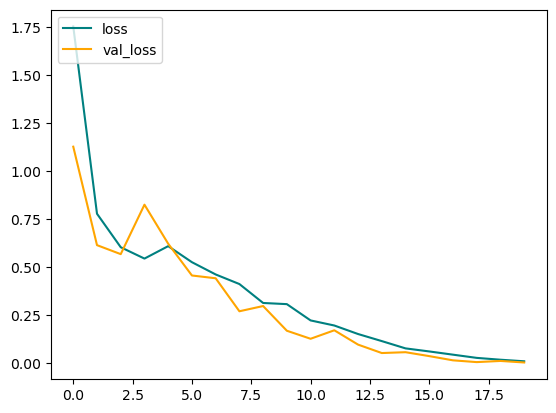

In [67]:
#hist.history stores all the history of our model losses and accuracy
fig = plt.Figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

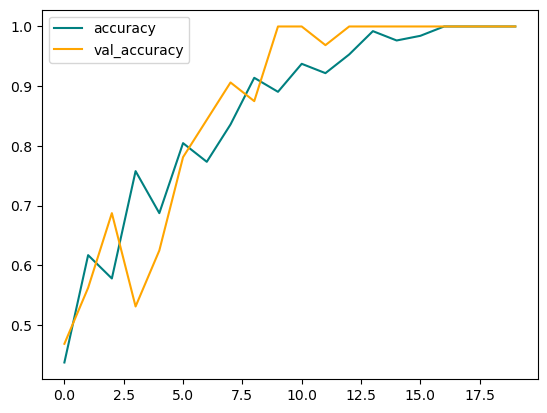

In [69]:
fig = plt.Figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

#### Evaluate Performance ####

**Evaluate**

In [72]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [73]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 220ms/step


In [74]:
#print test results
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


**Testing with few images**

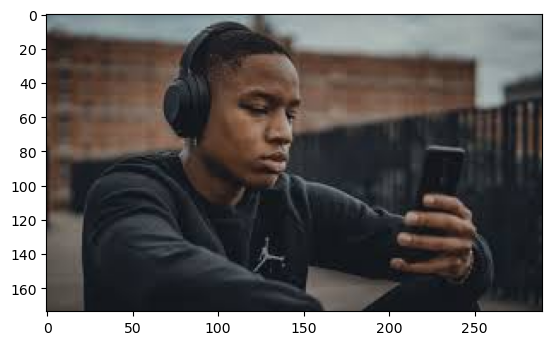

In [105]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

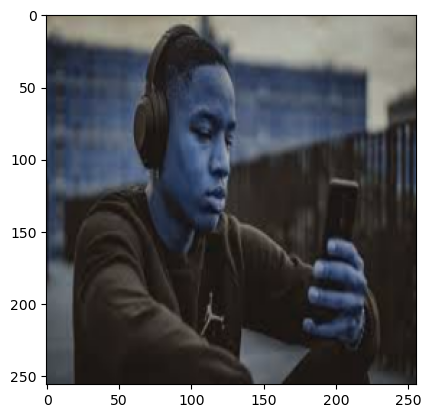

In [106]:
#to pass this to network we need to resize it
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [107]:
print(resize.shape)
#our model expects us to pass this test image in batch so we encapsulate it ito an extra dimension
np.expand_dims(resize, 0).shape

(256, 256, 3)


(1, 256, 256, 3)

In [108]:
#we also have to scale it so / 255
yhat = model.predict(np.expand_dims(resize/255, 0))
print(yhat)        #as the value is 0 then it means the pc is of happy 
if yhat > 0.5:
    print(f'predicted class is sad')
else:
    print(f'predicted class is Happy')

1/1 [==============================] - 0s 33ms/step
[[0.8667153]]
predicted class is sad


#### Save The Model ####

In [110]:
#in order to load that same model later we can use load model function by using this h5 file
model.save(os.path.join('models', 'imageclassifier.h5'))